In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Subhalo 000

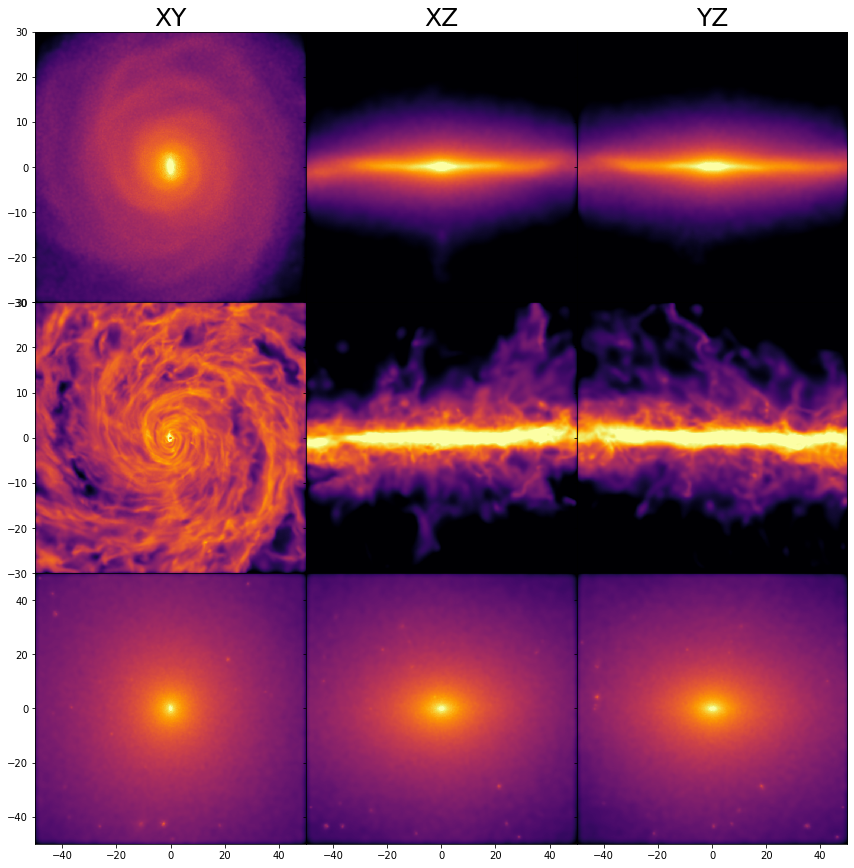

In [34]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
# import time_conversion as tiempo
import sphviewer as sph
from mpl_toolkits.axes_grid1 import make_axes_locatable



path = '/z/omarioni/gradients/_simulations/snap_127/'


for j in range(0,1):
    
    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')
    
    aexp = snap['/Time'][()]
    h    = snap['/h'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]


    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]*aexp/h
    ystr = pstr[:,1]*aexp/h
    zstr = pstr[:,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
    
    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vstr[:,0] *np.sqrt(aexp)
    v_y = vstr[:,1] *np.sqrt(aexp)
    v_z = vstr[:,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr/h
    mgas = mgas/h
    mdrk = mdrk/h

           
    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

# posiciones de particulas que se quiere graficar
# como lo de arriba me da los versores hago las posiciones con esto 

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr

    xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
    yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
    zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

    xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
    yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
    zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


    pos_str  = np.ndarray([np.size(xn_str),4])
    pos_str[:,0] = xn_str
    pos_str[:,1] = yn_str
    pos_str[:,2] = zn_str
    pos_str[:,3] = mstr
    
    pos_gas  = np.ndarray([np.size(xn_gas),4])
    pos_gas[:,0] = xn_gas
    pos_gas[:,1] = yn_gas
    pos_gas[:,2] = zn_gas
    pos_gas[:,3] = mgas

    pos_drk = np.ndarray([np.size(xn_drk),4])
    pos_drk[:,0] = xn_drk
    pos_drk[:,1] = yn_drk
    pos_drk[:,2] = zn_drk
    pos_drk[:,3] = mdrk


    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

    fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

#----------------------------------------------------------------------
#---------------------generador del grafico1-----------------
    rl= 30   
    corte,=np.where((xn_str <rl) & (yn_str <rl) & (zn_str <rl) & (xn_str >-rl) & (yn_str >-rl) & (zn_str >-rl))

#-----rango que tiene la escala  de colores-----
    vmin=6.0
    vmax=9.2
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='inferno'

    nb1 = 50
#         nb1 = 100 
#         npixel = 1000
    npixel = 1000

    particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,0].set_xlim(-30,30)
    ax[0,0].set_ylim(-30,30)
#     ax[0,0].set_xticks([])
#     ax[0,0].set_yticks([])
#     ax[0,0].set_yticklabels([])
    ax[0,0].set_xticklabels([])
#     ax[0,0].text(-4.5, 4, str('%s'%vector3[i])+'-GADGET2', fontsize=25, color='yellow', ha='left', va='center') 
    ax[0,0].set_title('XY', loc='center', fontsize=25)
#     ax[0,0].annotate("",xy=(-4, -4), xycoords='data',xytext=(-1, -4),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[0,0].text(-2.5, -4, '3kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
    particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    # ax[0,0]=fig.add_subplot(221)
    ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,1].set_xlim(-30,30)
    ax[0,1].set_ylim(-30,30)
#     ax[0,1].set_xticks([])
#     ax[0,1].set_yticks([])
    ax[0,1].set_xticklabels([])
    ax[0,1].set_yticklabels([])
    ax[0,1].set_title('XZ', loc='center', fontsize=25)

#--------------------------------------
    particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90, t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax[0,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap,vmin=vmin, vmax=vmax)
    ax[0,2].set_xlim(-30,30)
    ax[0,2].set_ylim(-30,30)
#     ax[0,2].set_xticks([])
#     ax[0,2].set_yticks([])
    ax[0,2].set_xticklabels([])
    ax[0,2].set_yticklabels([])
    ax[0,2].set_title('YZ', loc='center', fontsize=25)
#     ax[0,2].text(4, 4,str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico2-----------------
    rl= 30   
    corte,=np.where((xn_gas <rl) & (yn_gas <rl) & (zn_gas <rl) & (xn_gas >-rl) & (yn_gas >-rl) & (zn_gas >-rl))


    #-----rango que tiene la escala  de colores-----
    vmin=6.0
    vmax=8.0

    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='inferno'

#         nb1 = 100 
    nb1 = 50
    npixel = 1000

    particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
    rend1=sph.Render(escena)
    extent=escena.get_extent()
    rend1.set_logscale()

    ax[1,0].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,0].set_xlim(-30,30)
    ax[1,0].set_ylim(-30,30)
#     ax[1,0].set_xticks([])
#     ax[1,0].set_yticks([])
#     ax[1,0].set_yticklabels([])
    ax[1,0].set_xticklabels([])
#     ax[1,0].annotate("",xy=(-20, -20), xycoords='data',xytext=(-5, -20),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[1,0].text(-12.5, -20, '15kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
    particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,1].set_xlim(-30,30)
    ax[1,1].set_ylim(-30,30)
#     ax[1,1].set_xticks([])
#     ax[1,1].set_yticks([])
    ax[1,1].set_xticklabels([])
    ax[1,1].set_yticklabels([])

#--------------------------------------
    particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90,t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[1,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,2].set_xlim(-30,30)
    ax[1,2].set_ylim(-30,30)
#     ax[1,2].set_xticks([])
#     ax[1,2].set_yticks([])
    ax[1,2].set_xticklabels([])
    ax[1,2].set_yticklabels([])

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico3-----------------
    rl= 50   
    corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


    #-----rango que tiene la escala  de colores-----
    vmin=6.6
    vmax=9.3

    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='inferno'

#         nb1 = 300 
    nb1 = 50
    npixel = 1000

    particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
    rend2=sph.Render(escena)
    extent=escena.get_extent()
    rend2.set_logscale()

    ax[2,0].imshow(rend2.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[2,0].set_xlim(-50,50)
    ax[2,0].set_ylim(-50,50)
#     ax[2,0].set_xticks([])
#     ax[2,0].set_yticks([])
#     ax[2,0].set_xticklabels([])
#     ax[2,0].set_yticklabels([])
#     ax[2,0].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
    particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[2,1].set_xlim(-50,50)
    ax[2,1].set_ylim(-50,50)
#     ax[2,1].set_xticks([])
#     ax[2,1].set_yticks([])
#     ax[2,1].set_xticklabels([])
    ax[2,1].set_yticklabels([])

#--------------------------------------
    particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[2,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[2,2].set_xlim(-50,50)
    ax[2,2].set_ylim(-50,50)
#     ax[2,2].set_xticks([])
#     ax[2,2].set_yticks([])
#     ax[2,2].set_xticklabels([])
    ax[2,2].set_yticklabels([])
#     ax[2,2].text(45, -40,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='right', va='center') 
    
    plt.show()
    
    path2 = '/z/omarioni/gradients/_imagenes/'
    fig.savefig(path2 + 'subhalo_'+str('%03d'%j)+'.png', dpi = 100, xxbox_inches='tight')

    plt.close()

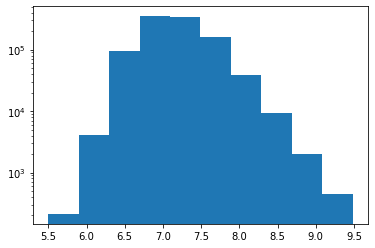

In [21]:
rend0.histogram(log=True)

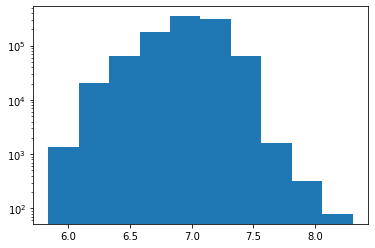

In [22]:
rend1.histogram(log=True)

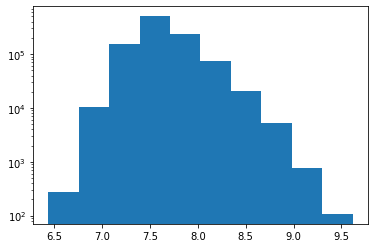

In [23]:
rend2.histogram(log=True)

### Subhalo 001

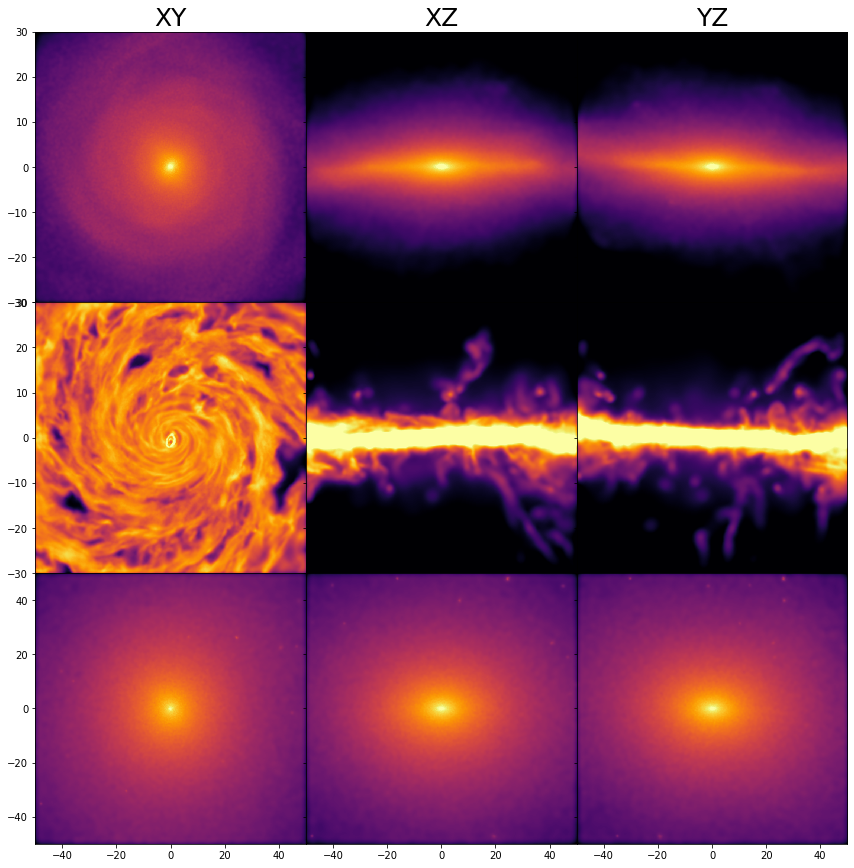

In [2]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
# import time_conversion as tiempo
import sphviewer as sph
from mpl_toolkits.axes_grid1 import make_axes_locatable



path = '/z/omarioni/gradients/_simulations/snap_127/'


# for j in range(1,2):
j=1
snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

aexp = snap['/Time'][()]
h    = snap['/h'][()]

pstr = snap['/Str/Coordinates'][()]
mstr = snap['/Str/Masses'][()]
vstr = snap['/Str/Velocities'][()]

pgas = snap['/Gas/Coordinates'][()]
mgas = snap['/Gas/Masses'][()]

pdrk = snap['/Drk/Coordinates'][()]
mdrk = snap['/Drk/Masses'][()]


#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = pstr[:,0]*aexp/h
ystr = pstr[:,1]*aexp/h
zstr = pstr[:,2]*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = pgas[:,0]*aexp/h
ygas = pgas[:,1]*aexp/h
zgas = pgas[:,2]*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = pdrk[:,0]*aexp/h
ydrk = pdrk[:,1]*aexp/h
zdrk = pdrk[:,2]*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vstr[:,0] *np.sqrt(aexp)
v_y = vstr[:,1] *np.sqrt(aexp)
v_z = vstr[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
mstr = mstr/h
mgas = mgas/h
mdrk = mdrk/h


veloc,=np.where(rstr < 3)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

# posiciones de particulas que se quiere graficar
# como lo de arriba me da los versores hago las posiciones con esto 

xn_str = e1x*xstr + e1y*ystr + e1z*zstr
yn_str = e2x*xstr + e2y*ystr + e2z*zstr
zn_str = e3x*xstr + e3y*ystr + e3z*zstr

xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


pos_str  = np.ndarray([np.size(xn_str),4])
pos_str[:,0] = xn_str
pos_str[:,1] = yn_str
pos_str[:,2] = zn_str
pos_str[:,3] = mstr

pos_gas  = np.ndarray([np.size(xn_gas),4])
pos_gas[:,0] = xn_gas
pos_gas[:,1] = yn_gas
pos_gas[:,2] = zn_gas
pos_gas[:,3] = mgas

pos_drk = np.ndarray([np.size(xn_drk),4])
pos_drk[:,0] = xn_drk
pos_drk[:,1] = yn_drk
pos_drk[:,2] = zn_drk
pos_drk[:,3] = mdrk


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

#----------------------------------------------------------------------
#---------------------generador del grafico1-----------------
rl= 30   
corte,=np.where((xn_str <rl) & (yn_str <rl) & (zn_str <rl) & (xn_str >-rl) & (yn_str >-rl) & (zn_str >-rl))

#-----rango que tiene la escala  de colores-----
vmin=6.0
vmax=9.3
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

nb1 = 50
#         nb1 = 100 
#         npixel = 1000
npixel = 1000

particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend0=sph.Render(escena)
extent=escena.get_extent()
rend0.set_logscale()

ax[0,0].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-30,30)
ax[0,0].set_ylim(-30,30)
#     ax[0,0].set_xticks([])
#     ax[0,0].set_yticks([])
#     ax[0,0].set_yticklabels([])
ax[0,0].set_xticklabels([])
#     ax[0,0].text(-4.5, 4, str('%s'%vector3[i])+'-GADGET2', fontsize=25, color='yellow', ha='left', va='center') 
ax[0,0].set_title('XY', loc='center', fontsize=25)
#     ax[0,0].annotate("",xy=(-4, -4), xycoords='data',xytext=(-1, -4),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[0,0].text(-2.5, -4, '3kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-30,30)
ax[0,1].set_ylim(-30,30)
#     ax[0,1].set_xticks([])
#     ax[0,1].set_yticks([])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_title('XZ', loc='center', fontsize=25)

#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90, t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap,vmin=vmin, vmax=vmax)
ax[0,2].set_xlim(-30,30)
ax[0,2].set_ylim(-30,30)
#     ax[0,2].set_xticks([])
#     ax[0,2].set_yticks([])
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
ax[0,2].set_title('YZ', loc='center', fontsize=25)
#     ax[0,2].text(4, 4,str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico2-----------------
rl= 30   
corte,=np.where((xn_gas <rl) & (yn_gas <rl) & (zn_gas <rl) & (xn_gas >-rl) & (yn_gas >-rl) & (zn_gas >-rl))


#-----rango que tiene la escala  de colores-----
vmin=5.5
vmax=7.5

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 100 
nb1 = 50
npixel = 1000

particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

ax[1,0].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-30,30)
ax[1,0].set_ylim(-30,30)
#     ax[1,0].set_xticks([])
#     ax[1,0].set_yticks([])
#     ax[1,0].set_yticklabels([])
ax[1,0].set_xticklabels([])
#     ax[1,0].annotate("",xy=(-20, -20), xycoords='data',xytext=(-5, -20),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[1,0].text(-12.5, -20, '15kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,1].set_xlim(-30,30)
ax[1,1].set_ylim(-30,30)
#     ax[1,1].set_xticks([])
#     ax[1,1].set_yticks([])
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90,t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,2].set_xlim(-30,30)
ax[1,2].set_ylim(-30,30)
#     ax[1,2].set_xticks([])
#     ax[1,2].set_yticks([])
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico3-----------------
rl= 50   
corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


#-----rango que tiene la escala  de colores-----
vmin=6.6
vmax=9.2

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 300 
nb1 = 50
npixel = 1000

particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend2=sph.Render(escena)
extent=escena.get_extent()
rend2.set_logscale()

ax[2,0].imshow(rend2.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,0].set_xlim(-50,50)
ax[2,0].set_ylim(-50,50)
#     ax[2,0].set_xticks([])
#     ax[2,0].set_yticks([])
#     ax[2,0].set_xticklabels([])
#     ax[2,0].set_yticklabels([])
#     ax[2,0].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,1].set_xlim(-50,50)
ax[2,1].set_ylim(-50,50)
#     ax[2,1].set_xticks([])
#     ax[2,1].set_yticks([])
#     ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,2].set_xlim(-50,50)
ax[2,2].set_ylim(-50,50)
#     ax[2,2].set_xticks([])
#     ax[2,2].set_yticks([])
#     ax[2,2].set_xticklabels([])
ax[2,2].set_yticklabels([])
#     ax[2,2].text(45, -40,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='right', va='center') 

plt.show()

path2 = '/z/omarioni/gradients/_imagenes/'
fig.savefig(path2 + 'subhalo_'+str('%03d'%j)+'.png', dpi = 100, xxbox_inches='tight')

plt.close()

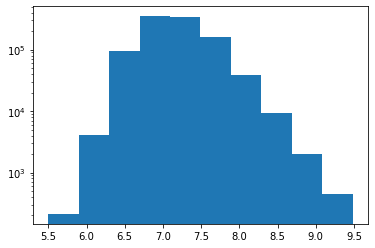

In [17]:
rend0.histogram(log=True)

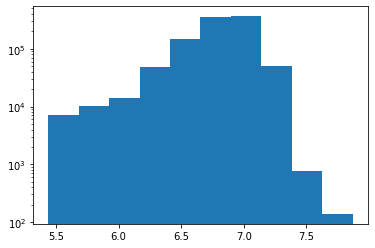

In [18]:
rend1.histogram(log=True)

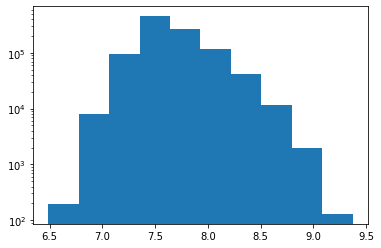

In [19]:
rend2.histogram(log=True)

### Subhalo 003

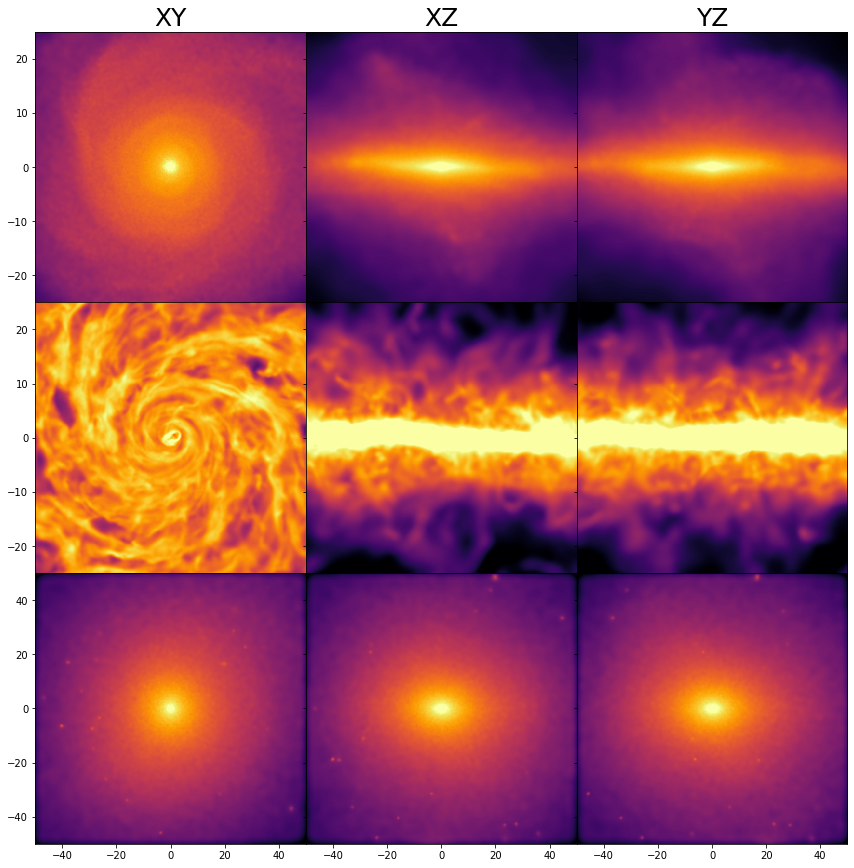

In [15]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
# import time_conversion as tiempo
import sphviewer as sph
from mpl_toolkits.axes_grid1 import make_axes_locatable



path = '/z/omarioni/gradients/_simulations/snap_127/'


# for j in range(1,2):
j=3
snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

aexp = snap['/Time'][()]
h    = snap['/h'][()]

pstr = snap['/Str/Coordinates'][()]
mstr = snap['/Str/Masses'][()]
vstr = snap['/Str/Velocities'][()]

pgas = snap['/Gas/Coordinates'][()]
mgas = snap['/Gas/Masses'][()]

pdrk = snap['/Drk/Coordinates'][()]
mdrk = snap['/Drk/Masses'][()]


#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = pstr[:,0]*aexp/h
ystr = pstr[:,1]*aexp/h
zstr = pstr[:,2]*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = pgas[:,0]*aexp/h
ygas = pgas[:,1]*aexp/h
zgas = pgas[:,2]*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = pdrk[:,0]*aexp/h
ydrk = pdrk[:,1]*aexp/h
zdrk = pdrk[:,2]*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vstr[:,0] *np.sqrt(aexp)
v_y = vstr[:,1] *np.sqrt(aexp)
v_z = vstr[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
mstr = mstr/h
mgas = mgas/h
mdrk = mdrk/h


veloc,=np.where(rstr < 3)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

# posiciones de particulas que se quiere graficar
# como lo de arriba me da los versores hago las posiciones con esto 

xn_str = e1x*xstr + e1y*ystr + e1z*zstr
yn_str = e2x*xstr + e2y*ystr + e2z*zstr
zn_str = e3x*xstr + e3y*ystr + e3z*zstr

xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


pos_str  = np.ndarray([np.size(xn_str),4])
pos_str[:,0] = xn_str
pos_str[:,1] = yn_str
pos_str[:,2] = zn_str
pos_str[:,3] = mstr

pos_gas  = np.ndarray([np.size(xn_gas),4])
pos_gas[:,0] = xn_gas
pos_gas[:,1] = yn_gas
pos_gas[:,2] = zn_gas
pos_gas[:,3] = mgas

pos_drk = np.ndarray([np.size(xn_drk),4])
pos_drk[:,0] = xn_drk
pos_drk[:,1] = yn_drk
pos_drk[:,2] = zn_drk
pos_drk[:,3] = mdrk


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

#----------------------------------------------------------------------
#---------------------generador del grafico1-----------------
rl= 30   
corte,=np.where((xn_str <rl) & (yn_str <rl) & (zn_str <rl) & (xn_str >-rl) & (yn_str >-rl) & (zn_str >-rl))

#-----rango que tiene la escala  de colores-----
vmin=5.0
vmax=8.8
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

nb1 = 50
#         nb1 = 100 
#         npixel = 1000
npixel = 1000

particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend0=sph.Render(escena)
extent=escena.get_extent()
rend0.set_logscale()

ax[0,0].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-25,25)
ax[0,0].set_ylim(-25,25)
#     ax[0,0].set_xticks([])
#     ax[0,0].set_yticks([])
#     ax[0,0].set_yticklabels([])
ax[0,0].set_xticklabels([])
#     ax[0,0].text(-4.5, 4, str('%s'%vector3[i])+'-GADGET2', fontsize=25, color='yellow', ha='left', va='center') 
ax[0,0].set_title('XY', loc='center', fontsize=25)
#     ax[0,0].annotate("",xy=(-4, -4), xycoords='data',xytext=(-1, -4),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[0,0].text(-2.5, -4, '3kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-25,25)
ax[0,1].set_ylim(-25,25)
#     ax[0,1].set_xticks([])
#     ax[0,1].set_yticks([])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_title('XZ', loc='center', fontsize=25)

#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90, t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap,vmin=vmin, vmax=vmax)
ax[0,2].set_xlim(-25,25)
ax[0,2].set_ylim(-25,25)
#     ax[0,2].set_xticks([])
#     ax[0,2].set_yticks([])
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
ax[0,2].set_title('YZ', loc='center', fontsize=25)
#     ax[0,2].text(4, 4,str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico2-----------------
rl= 30   
corte,=np.where((xn_gas <rl) & (yn_gas <rl) & (zn_gas <rl) & (xn_gas >-rl) & (yn_gas >-rl) & (zn_gas >-rl))


#-----rango que tiene la escala  de colores-----
vmin=5.6
vmax=7.5

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 100 
nb1 = 60
npixel = 1000

particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

ax[1,0].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-25,25)
ax[1,0].set_ylim(-25,25)
#     ax[1,0].set_xticks([])
#     ax[1,0].set_yticks([])
#     ax[1,0].set_yticklabels([])
ax[1,0].set_xticklabels([])
#     ax[1,0].annotate("",xy=(-20, -20), xycoords='data',xytext=(-5, -20),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[1,0].text(-12.5, -20, '15kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,1].set_xlim(-25,25)
ax[1,1].set_ylim(-25,25)
#     ax[1,1].set_xticks([])
#     ax[1,1].set_yticks([])
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90,t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,2].set_xlim(-25,25)
ax[1,2].set_ylim(-25,25)
#     ax[1,2].set_xticks([])
#     ax[1,2].set_yticks([])
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico3-----------------
rl= 50   
corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


#-----rango que tiene la escala  de colores-----
vmin=6.3
vmax=8.8

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 300 
nb1 = 50
npixel = 1000

particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend2=sph.Render(escena)
extent=escena.get_extent()
rend2.set_logscale()

ax[2,0].imshow(rend2.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,0].set_xlim(-50,50)
ax[2,0].set_ylim(-50,50)
#     ax[2,0].set_xticks([])
#     ax[2,0].set_yticks([])
#     ax[2,0].set_xticklabels([])
#     ax[2,0].set_yticklabels([])
#     ax[2,0].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,1].set_xlim(-50,50)
ax[2,1].set_ylim(-50,50)
#     ax[2,1].set_xticks([])
#     ax[2,1].set_yticks([])
#     ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,2].set_xlim(-50,50)
ax[2,2].set_ylim(-50,50)
#     ax[2,2].set_xticks([])
#     ax[2,2].set_yticks([])
#     ax[2,2].set_xticklabels([])
ax[2,2].set_yticklabels([])
#     ax[2,2].text(45, -40,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='right', va='center') 

plt.show()

path2 = '/z/omarioni/gradients/_imagenes/'
fig.savefig(path2 + 'subhalo_'+str('%03d'%j)+'.png', dpi = 100, xxbox_inches='tight')

plt.close()

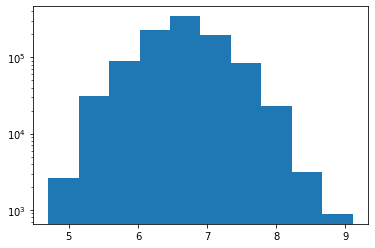

In [12]:
rend0.histogram(log=True)

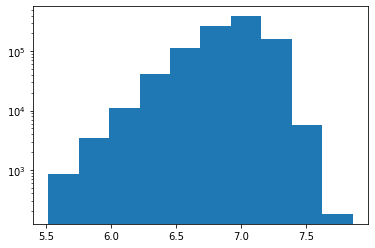

In [13]:
rend1.histogram(log=True)

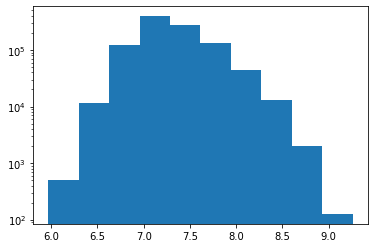

In [14]:
rend2.histogram(log=True)

### Subhalo 004 

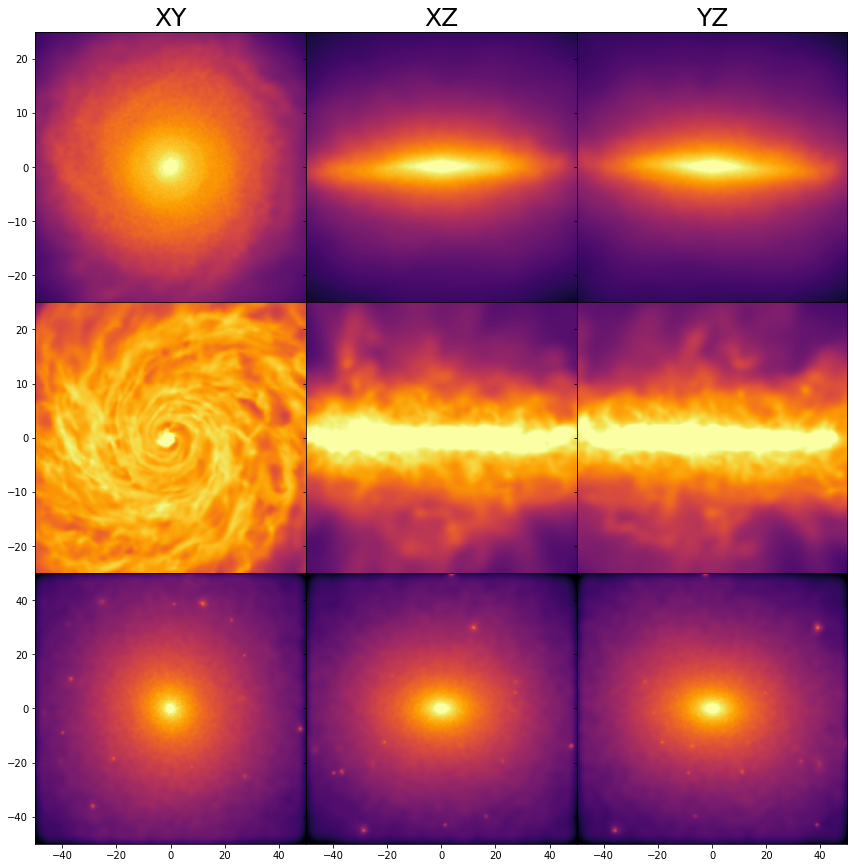

In [29]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
# import time_conversion as tiempo
import sphviewer as sph
from mpl_toolkits.axes_grid1 import make_axes_locatable



path = '/z/omarioni/gradients/_simulations/snap_127/'


# for j in range(1,2):
j=4
snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

aexp = snap['/Time'][()]
h    = snap['/h'][()]

pstr = snap['/Str/Coordinates'][()]
mstr = snap['/Str/Masses'][()]
vstr = snap['/Str/Velocities'][()]

pgas = snap['/Gas/Coordinates'][()]
mgas = snap['/Gas/Masses'][()]

pdrk = snap['/Drk/Coordinates'][()]
mdrk = snap['/Drk/Masses'][()]


#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = pstr[:,0]*aexp/h
ystr = pstr[:,1]*aexp/h
zstr = pstr[:,2]*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = pgas[:,0]*aexp/h
ygas = pgas[:,1]*aexp/h
zgas = pgas[:,2]*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = pdrk[:,0]*aexp/h
ydrk = pdrk[:,1]*aexp/h
zdrk = pdrk[:,2]*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vstr[:,0] *np.sqrt(aexp)
v_y = vstr[:,1] *np.sqrt(aexp)
v_z = vstr[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
mstr = mstr/h
mgas = mgas/h
mdrk = mdrk/h


veloc,=np.where(rstr < 3)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

# posiciones de particulas que se quiere graficar
# como lo de arriba me da los versores hago las posiciones con esto 

xn_str = e1x*xstr + e1y*ystr + e1z*zstr
yn_str = e2x*xstr + e2y*ystr + e2z*zstr
zn_str = e3x*xstr + e3y*ystr + e3z*zstr

xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


pos_str  = np.ndarray([np.size(xn_str),4])
pos_str[:,0] = xn_str
pos_str[:,1] = yn_str
pos_str[:,2] = zn_str
pos_str[:,3] = mstr

pos_gas  = np.ndarray([np.size(xn_gas),4])
pos_gas[:,0] = xn_gas
pos_gas[:,1] = yn_gas
pos_gas[:,2] = zn_gas
pos_gas[:,3] = mgas

pos_drk = np.ndarray([np.size(xn_drk),4])
pos_drk[:,0] = xn_drk
pos_drk[:,1] = yn_drk
pos_drk[:,2] = zn_drk
pos_drk[:,3] = mdrk


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

#----------------------------------------------------------------------
#---------------------generador del grafico1-----------------
rl= 30   
corte,=np.where((xn_str <rl) & (yn_str <rl) & (zn_str <rl) & (xn_str >-rl) & (yn_str >-rl) & (zn_str >-rl))

#-----rango que tiene la escala  de colores-----
vmin=3.5
vmax=8.5
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

nb1 = 50
#         nb1 = 100 
#         npixel = 1000
npixel = 1000

particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend0=sph.Render(escena)
extent=escena.get_extent()
rend0.set_logscale()

ax[0,0].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-25,25)
ax[0,0].set_ylim(-25,25)
#     ax[0,0].set_xticks([])
#     ax[0,0].set_yticks([])
#     ax[0,0].set_yticklabels([])
ax[0,0].set_xticklabels([])
#     ax[0,0].text(-4.5, 4, str('%s'%vector3[i])+'-GADGET2', fontsize=25, color='yellow', ha='left', va='center') 
ax[0,0].set_title('XY', loc='center', fontsize=25)
#     ax[0,0].annotate("",xy=(-4, -4), xycoords='data',xytext=(-1, -4),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[0,0].text(-2.5, -4, '3kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-25,25)
ax[0,1].set_ylim(-25,25)
#     ax[0,1].set_xticks([])
#     ax[0,1].set_yticks([])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_title('XZ', loc='center', fontsize=25)

#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90, t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap,vmin=vmin, vmax=vmax)
ax[0,2].set_xlim(-25,25)
ax[0,2].set_ylim(-25,25)
#     ax[0,2].set_xticks([])
#     ax[0,2].set_yticks([])
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
ax[0,2].set_title('YZ', loc='center', fontsize=25)
#     ax[0,2].text(4, 4,str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico2-----------------
rl= 30   
corte,=np.where((xn_gas <rl) & (yn_gas <rl) & (zn_gas <rl) & (xn_gas >-rl) & (yn_gas >-rl) & (zn_gas >-rl))


#-----rango que tiene la escala  de colores-----
vmin=4.5
vmax=7.5

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 100 
nb1 = 60
npixel = 1000

particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

ax[1,0].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-25,25)
ax[1,0].set_ylim(-25,25)
#     ax[1,0].set_xticks([])
#     ax[1,0].set_yticks([])
#     ax[1,0].set_yticklabels([])
ax[1,0].set_xticklabels([])
#     ax[1,0].annotate("",xy=(-20, -20), xycoords='data',xytext=(-5, -20),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[1,0].text(-12.5, -20, '15kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,1].set_xlim(-25,25)
ax[1,1].set_ylim(-25,25)
#     ax[1,1].set_xticks([])
#     ax[1,1].set_yticks([])
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90,t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,2].set_xlim(-25,25)
ax[1,2].set_ylim(-25,25)
#     ax[1,2].set_xticks([])
#     ax[1,2].set_yticks([])
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico3-----------------
rl= 50   
corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


#-----rango que tiene la escala  de colores-----
vmin=6.0
vmax=8.7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 300 
nb1 = 50
npixel = 1000

particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend2=sph.Render(escena)
extent=escena.get_extent()
rend2.set_logscale()

ax[2,0].imshow(rend2.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,0].set_xlim(-50,50)
ax[2,0].set_ylim(-50,50)
#     ax[2,0].set_xticks([])
#     ax[2,0].set_yticks([])
#     ax[2,0].set_xticklabels([])
#     ax[2,0].set_yticklabels([])
#     ax[2,0].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,1].set_xlim(-50,50)
ax[2,1].set_ylim(-50,50)
#     ax[2,1].set_xticks([])
#     ax[2,1].set_yticks([])
#     ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,2].set_xlim(-50,50)
ax[2,2].set_ylim(-50,50)
#     ax[2,2].set_xticks([])
#     ax[2,2].set_yticks([])
#     ax[2,2].set_xticklabels([])
ax[2,2].set_yticklabels([])
#     ax[2,2].text(45, -40,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='right', va='center') 

plt.show()

path2 = '/z/omarioni/gradients/_imagenes/'
fig.savefig(path2 + 'subhalo_'+str('%03d'%j)+'.png', dpi = 100, xxbox_inches='tight')

plt.close()

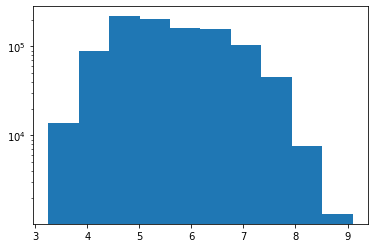

In [26]:
rend0.histogram(log=True)

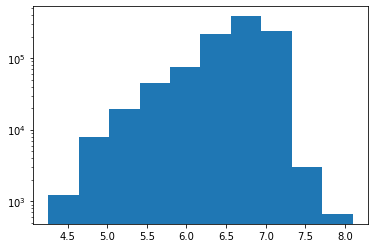

In [27]:
rend1.histogram(log=True)

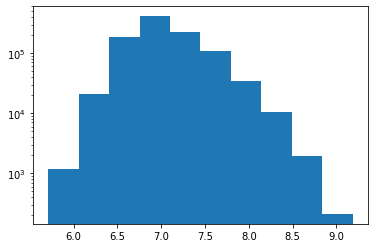

In [28]:
rend2.histogram(log=True)

### Subhalo 005 

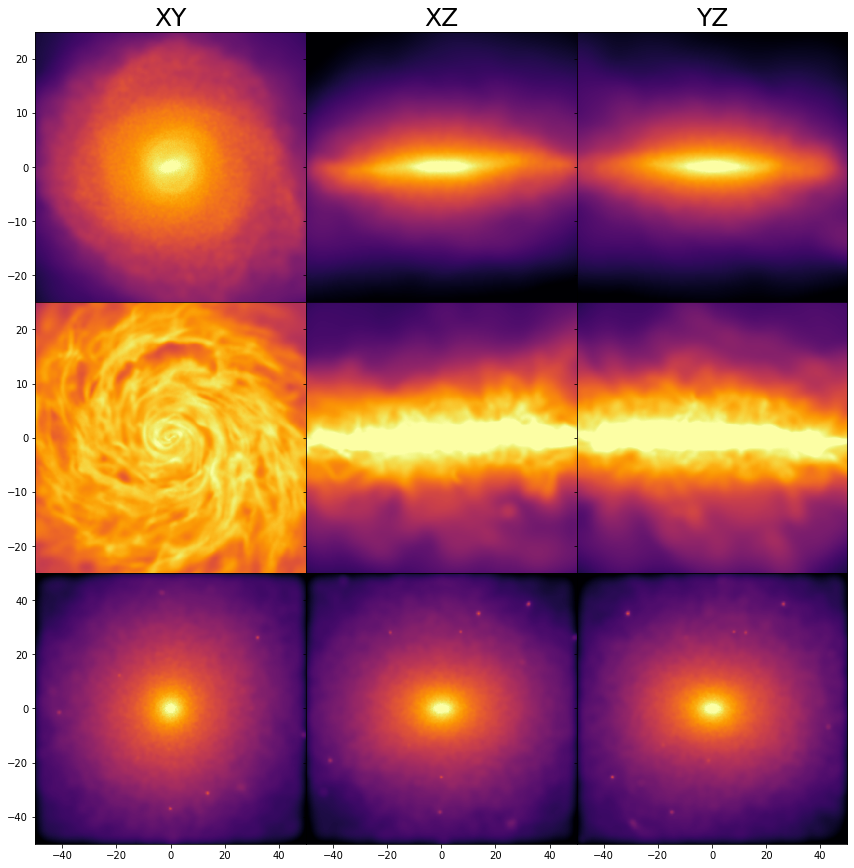

In [36]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
# import time_conversion as tiempo
import sphviewer as sph
from mpl_toolkits.axes_grid1 import make_axes_locatable



path = '/z/omarioni/gradients/_simulations/snap_127/'


# for j in range(1,2):
j=5
snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

aexp = snap['/Time'][()]
h    = snap['/h'][()]

pstr = snap['/Str/Coordinates'][()]
mstr = snap['/Str/Masses'][()]
vstr = snap['/Str/Velocities'][()]

pgas = snap['/Gas/Coordinates'][()]
mgas = snap['/Gas/Masses'][()]

pdrk = snap['/Drk/Coordinates'][()]
mdrk = snap['/Drk/Masses'][()]


#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = pstr[:,0]*aexp/h
ystr = pstr[:,1]*aexp/h
zstr = pstr[:,2]*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

xgas = pgas[:,0]*aexp/h
ygas = pgas[:,1]*aexp/h
zgas = pgas[:,2]*aexp/h
rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

xdrk = pdrk[:,0]*aexp/h
ydrk = pdrk[:,1]*aexp/h
zdrk = pdrk[:,2]*aexp/h
rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

v_x = vstr[:,0] *np.sqrt(aexp)
v_y = vstr[:,1] *np.sqrt(aexp)
v_z = vstr[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
mstr = mstr/h
mgas = mgas/h
mdrk = mdrk/h


veloc,=np.where(rstr < 3)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

# posiciones de particulas que se quiere graficar
# como lo de arriba me da los versores hago las posiciones con esto 

xn_str = e1x*xstr + e1y*ystr + e1z*zstr
yn_str = e2x*xstr + e2y*ystr + e2z*zstr
zn_str = e3x*xstr + e3y*ystr + e3z*zstr

xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


pos_str  = np.ndarray([np.size(xn_str),4])
pos_str[:,0] = xn_str
pos_str[:,1] = yn_str
pos_str[:,2] = zn_str
pos_str[:,3] = mstr

pos_gas  = np.ndarray([np.size(xn_gas),4])
pos_gas[:,0] = xn_gas
pos_gas[:,1] = yn_gas
pos_gas[:,2] = zn_gas
pos_gas[:,3] = mgas

pos_drk = np.ndarray([np.size(xn_drk),4])
pos_drk[:,0] = xn_drk
pos_drk[:,1] = yn_drk
pos_drk[:,2] = zn_drk
pos_drk[:,3] = mdrk


fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

#----------------------------------------------------------------------
#---------------------generador del grafico1-----------------
rl= 30   
corte,=np.where((xn_str <rl) & (yn_str <rl) & (zn_str <rl) & (xn_str >-rl) & (yn_str >-rl) & (zn_str >-rl))

#-----rango que tiene la escala  de colores-----
vmin=3.5
vmax=8.5
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

nb1 = 50
#         nb1 = 100 
#         npixel = 1000
npixel = 1000

particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend0=sph.Render(escena)
extent=escena.get_extent()
rend0.set_logscale()

ax[0,0].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-25,25)
ax[0,0].set_ylim(-25,25)
#     ax[0,0].set_xticks([])
#     ax[0,0].set_yticks([])
#     ax[0,0].set_yticklabels([])
ax[0,0].set_xticklabels([])
#     ax[0,0].text(-4.5, 4, str('%s'%vector3[i])+'-GADGET2', fontsize=25, color='yellow', ha='left', va='center') 
ax[0,0].set_title('XY', loc='center', fontsize=25)
#     ax[0,0].annotate("",xy=(-4, -4), xycoords='data',xytext=(-1, -4),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[0,0].text(-2.5, -4, '3kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

# ax[0,0]=fig.add_subplot(221)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-25,25)
ax[0,1].set_ylim(-25,25)
#     ax[0,1].set_xticks([])
#     ax[0,1].set_yticks([])
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_title('XZ', loc='center', fontsize=25)

#--------------------------------------
particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90, t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap,vmin=vmin, vmax=vmax)
ax[0,2].set_xlim(-25,25)
ax[0,2].set_ylim(-25,25)
#     ax[0,2].set_xticks([])
#     ax[0,2].set_yticks([])
ax[0,2].set_xticklabels([])
ax[0,2].set_yticklabels([])
ax[0,2].set_title('YZ', loc='center', fontsize=25)
#     ax[0,2].text(4, 4,str('%.3f'%time)+'Gyr', fontsize=25, color='yellow', ha='right', va='center') 

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico2-----------------
rl= 30   
corte,=np.where((xn_gas <rl) & (yn_gas <rl) & (zn_gas <rl) & (xn_gas >-rl) & (yn_gas >-rl) & (zn_gas >-rl))


#-----rango que tiene la escala  de colores-----
vmin=4.5
vmax=7.4

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 100 
nb1 = 60
npixel = 1000

particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend1=sph.Render(escena)
extent=escena.get_extent()
rend1.set_logscale()

ax[1,0].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-25,25)
ax[1,0].set_ylim(-25,25)
#     ax[1,0].set_xticks([])
#     ax[1,0].set_yticks([])
#     ax[1,0].set_yticklabels([])
ax[1,0].set_xticklabels([])
#     ax[1,0].annotate("",xy=(-20, -20), xycoords='data',xytext=(-5, -20),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[1,0].text(-12.5, -20, '15kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,1].set_xlim(-25,25)
ax[1,1].set_ylim(-25,25)
#     ax[1,1].set_xticks([])
#     ax[1,1].set_yticks([])
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90,t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[1,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,2].set_xlim(-25,25)
ax[1,2].set_ylim(-25,25)
#     ax[1,2].set_xticks([])
#     ax[1,2].set_yticks([])
ax[1,2].set_xticklabels([])
ax[1,2].set_yticklabels([])

#--------------------------------------------------------------------------------------------------------
#---------------------generador del grafico3-----------------
rl= 50   
corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


#-----rango que tiene la escala  de colores-----
vmin=6.0
vmax=8.7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

#         nb1 = 300 
nb1 = 50
npixel = 1000

particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend2=sph.Render(escena)
extent=escena.get_extent()
rend2.set_logscale()

ax[2,0].imshow(rend2.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,0].set_xlim(-50,50)
ax[2,0].set_ylim(-50,50)
#     ax[2,0].set_xticks([])
#     ax[2,0].set_yticks([])
#     ax[2,0].set_xticklabels([])
#     ax[2,0].set_yticklabels([])
#     ax[2,0].annotate("",xy=(-40, -40), xycoords='data',xytext=(-10, -40),textcoords='data',
#                  ha='center', va='center', 
#                 arrowprops=dict(arrowstyle="|-|", connectionstyle='arc3', color ='white', lw=2.5))

#     ax[2,0].text(-25, -40, '30kpc', fontsize=25, color='white', ha='center', va='bottom')


#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,1].set_xlim(-50,50)
ax[2,1].set_ylim(-50,50)
#     ax[2,1].set_xticks([])
#     ax[2,1].set_yticks([])
#     ax[2,1].set_xticklabels([])
ax[2,1].set_yticklabels([])

#--------------------------------------
particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()


ax[2,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[2,2].set_xlim(-50,50)
ax[2,2].set_ylim(-50,50)
#     ax[2,2].set_xticks([])
#     ax[2,2].set_yticks([])
#     ax[2,2].set_xticklabels([])
ax[2,2].set_yticklabels([])
#     ax[2,2].text(45, -40,'z='+str('%.3f'%z), fontsize=25, color='yellow', ha='right', va='center') 

plt.show()

path2 = '/z/omarioni/gradients/_imagenes/'
fig.savefig(path2 + 'subhalo_'+str('%03d'%j)+'.png', dpi = 100, xxbox_inches='tight')

plt.close()

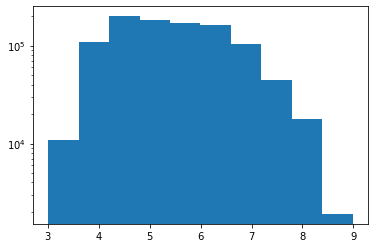

In [31]:
rend0.histogram(log=True)

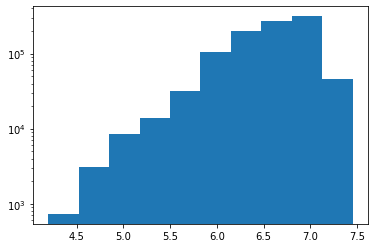

In [32]:
rend1.histogram(log=True)

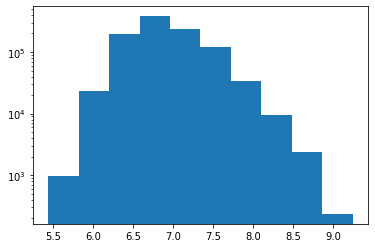

In [33]:
rend2.histogram(log=True)